In [10]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
import auto_rt_pred as arp
import seaborn as sns
import matplotlib as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("data/multiRT/Combined dataset.csv")

In [4]:
df = df.rename({'SMILES': 'smiles'}, axis=1)  # new method
df = df.rename({'RT': 'retention_time'}, axis=1)

In [13]:
df['Column'].value_counts()

C18-Mixed    1153
C18-RP        839
HILIC         836
Biphenyl      133
Name: Column, dtype: int64

In [15]:
df_RP = df.loc[df['Column']=='C18-RP']

<AxesSubplot:xlabel='pH', ylabel='Count'>

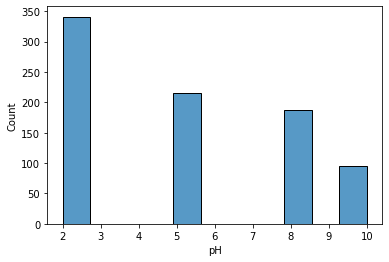

In [17]:
sns.histplot(df_RP['pH'])

In [20]:
len(df_RP['Compound_name'].unique())

74

In [9]:
model = arp.auto_rt_pred_with_autogluon_with_descriptor(df, 'testplace')

	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "testplace/"
AutoGluon Version:  0.4.1b20220404
Python Version:     3.9.10
Operating System:   Darwin
Train Data Rows:    1391
Train Data Columns: 1613
Label Column: retention_time
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8.56, 0.212, 3.84872, 1.80528)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:   

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.583667       0.399825  79.180104                0.000419           0.093231            2       True         11
1        NeuralNetTorch  -0.586656       0.183403  39.004216                0.183403          39.004216            1       True          9
2            LightGBMXT  -0.690311       0.022973  16.460499                0.022973          16.460499            1       True          3
3       NeuralNetFastAI  -0.709097       0.163543   9.177437                0.163543           9.177437            1       True          7
4              LightGBM  -0.718595       0.029488  14.444721                0.029488          14.444721            1       True          4
5         LightGBMLarge  -0.744094       0.025050  80.355235                0.025050          80.355235 

Evaluation: root_mean_squared_error on test data: -0.5782428929922612
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -0.5782428929922612
}


{'root_mean_squared_error': -0.5782428929922612}
